# Classification


### Machine Learning and Computational Statistics (DSC6135)

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from sklearn import preprocessing, linear_model

In [4]:
# setting up variables for later computation
rand_state = 2
test_size = 0.3

# set random seed
np.random.seed(rand_state)

#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='blue')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='red', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Blues')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    
    return ax

### latex definitions in this cell
$\def \w {\boldsymbol{w}}$
$\def \x {\boldsymbol{x}}$
$\def \y {\boldsymbol{y}}$

## 1. Introduction to Classification

<table><tr><td><img src="figs/cla1.png" width="80%"></td><td><img src="figs/cla2.png" width="85%"></td></tr></table>

## Example: Binary Classification

<img src="figs/cats_dogs.jpeg" width="80%">

## Classification overview

* Steps for classification
    1. What is prediction?  --> hard binary vs. probabilities
    2. What is training?  --> we need a model
    3. How to evaluate  --> we need performance metrics
    

* Possible methods for classification
    1. Logistic Regression
    2. Decission Tree Regression
    3. K-Nearest Neighbors

## Binary Prediction Step

<img src="figs/03_classification/prediction1.png" width="65%">

<img src="figs/03_classification/prediction2.png" width="55%">

## Probability Prediction Step

<img src="figs/03_classification/prediction3.png" width="85%">

## Probability Prediction Step

<img src="figs/03_classification/prediction4.png" width="85%">

# Logistic Regression: Linear Decision Boundary

We can try to model the **probability** of a data point being from a particular class by
1. which side of the decision boundary it's on
2. how far it is away from the boundary. Intuitively, the farther a data point is from the decision boundary, the more 'certain' we should be of it's classification.

<img src="figs/decision_boundary0.png" alt="" style="height: 300px;"/>

# Logistic Regression: Linear Decision Boundary

When the decision boundary is linear, it is defined by the equation
$$
\mathbf{w}^\top \mathbf{x} = w_0x_0 + w_1x_1 + \ldots + w_D x_D = 0
$$
where $x_0 = 1$.

The vector $\mathbf{w}$ allow us to gauge the 'distance' of a point from the decision boundary
<img src="figs/decision_boundary1.png" alt="" style="height: 300px;"/>

To model the probability of labeling a point a certain class, we have to convert distance, $\mathbf{w}^\top\mathbf{x}$ (which is unbounded) into a number between 0 and 1, using the ***sigmoid function***:
<img src="figs/sigmoid.png" alt="" style="height: 200px;"/>

$$
\sigma(z) = \frac{1}{1+e^{-z}},
$$

---

$$
\text{Prob}[y = 1 | \mathbf{x}] = \sigma(\mathbf{w}^\top\mathbf{x})
$$
If $\text{Prob}[y = 1 | \mathbf{x}] \geq 0.5$ we label $\mathbf{x}$ class 1, otherwise we label it class 0.


To *fit* our model, we need to learn the parameters of $\mathbf{w}$ that maximizes the likelihood of our training data.

## How to generate data from logistic model?

In [5]:
def plot_logistic(X,y):
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Class 1')
    plt.plot(xspan, boundary)
    plt.xlabel('Feature 1')  # label axes
    plt.ylabel('Feature 2')
    plt.title('Toy Data Set for Binary Classification')  # label title
    plt.legend()
    plt.show()

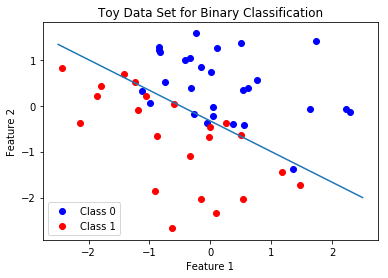

In [6]:
x1 = np.random.randn(50, 1)  # some continuous features 
x2 = np.random.randn(50, 1)
X = np.hstack((x1, x2))
z = 1 + 2*x1 + 3*x2  # linear combination with a bias
pr = 1/(1+np.exp(-z))  # pass through an inv-logit function
y = np.random.binomial(1, pr).reshape(-1) # bernoulli response variable
xspan = np.linspace(-2.5, 2.5, 100)
boundary = -(1+2*xspan) / 3.0

plot_logistic(X,y)


## Logistic Loss

* We are given training data $X=(x_1,\ldots,x_N)$, $y=(y_1,\ldots,y_N)$, where $x_i\in\mathbb{R}^p$ and $y_i\in\{1,0\}$.  
* We assign a probability based on the logistic function to each data point for belonging to a specific class:
\begin{equation}
	p = \text{Prob}[y=1|x] = \frac{1}{1+e^{-\mathbf{w}^T x}},
\label{eq:logistic-function}
\end{equation}
and $\text{Prob}[y=0|x] = 1-\text{Prob}[y=1|x]$.

* We employ a Bernoulli random variable with probability mass function:
\begin{equation}
	J(X,y,\mathbf{w}) = \prod_{i=1}^N \text{Prob}[y=y_i|x] = \prod_{i=1}^N p^{y_i} (1-p)^{1-y_i}
\end{equation}
* $J$ is the maximum likelihood estimator we want to minimize, given the model.
* For optimization purposes, we maximize the log-likelihood:
$$
\max_{\mathbf{w}}  \log \big[\prod_{i=1}^N p^{y_i} (1-p)^{1-y_i}\big]
$$

$$
	\max_{\mathbf{w}}  \sum_{i=1}^N \big[y_i \log(1+e^{-(\mathbf{w}^T x_i)})
	+ (1-y_i) \log (1+ e^{(\mathbf{w}^T x_i)}\big]
$$

In [7]:
## Example

# read training toy data set
linear_toy_data= pd.read_csv('toy_data_train.txt', delimiter=',')
X_train = linear_toy_data.values[:, :-1]
y_train = linear_toy_data.values[:, -1]
# read testing toy data set
linear_toy_data = pd.read_csv('toy_data_test.txt', delimiter=',')
X_test = linear_toy_data.values[:, :-1]
y_test = linear_toy_data.values[:, -1]

## Example with sklearn:

In [8]:
# create a logistic regression model with linear boundary
logreg = linear_model.LogisticRegression(C=1.0, solver='lbfgs')
# fit our logistic regression model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
def plot_fig(X_train,y_train):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # plot class 1
    ax[0].scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='blue', label='Class 1')
    # plot class 0
    ax[0].scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='Class 0', alpha=0.3)
    ax[0].set_xlabel('Feature 1')  # label axes
    ax[0].set_ylabel('Feature 2')
    ax[0].set_title('Training Toy Data Set for Binary Classification')  # label title
    ax[0].legend()  # add legend
    
    # plot decision boundary
    ax[1] = plot_decision_boundary(X_train, y_train, logreg, 'Logistic Regression (linear boundary)', ax[1])
    
    plt.tight_layout()
    plt.show()

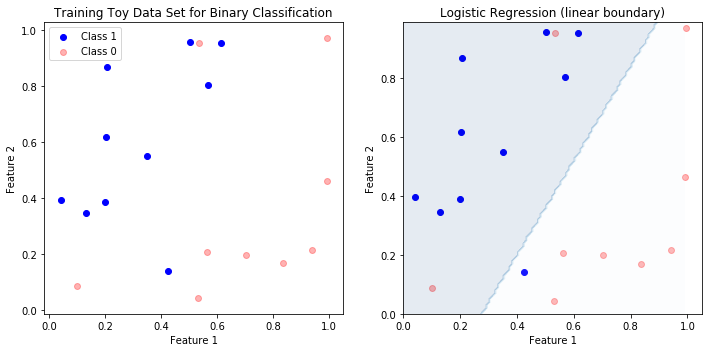

In [10]:
# plot data and decision boundary of logistic regression
plot_fig(X_train,y_train)

In [11]:
# evaluate model
scores_df = pd.DataFrame(data={'logistic regression': [logreg.score(X_train, y_train), logreg.score(X_test, y_test)]}, 
                         index=['train score', 'test score'])
scores_df.head()

,logistic regression
train score,0.842105
test score,0.759494


**Questions:** Why does the model do worse on testing data rather than training data?

## Optimization of the logistic loss

* Summary of variables:
    * Feature vector: $$\mathbf{x} = [1\: x_1\: x_2\:\ldots\:{x}_F]^T$$
    * Weight vector: $$\mathbf{w} = [w_0\: w_1\: w_2\:\ldots\:{w}_F]^T$$
    * Score: $$z_i = \mathbf{w}^T \mathbf{x}$$
    * Loss (minimization): $$\sum_{i=1}^N - [y_i \log(1+\exp^{-(\mathbf{w}^T x_i)}) + (1-y_i) \log (1+ \exp^{(\mathbf{w}^T x_i)}]$$

* Gradient of the sigmoid:
    $$ 
    \frac{\partial \sigma(z)}{\partial z} = 
    \frac{\partial}{\partial z} (1+e^{-z})^{-1} =
     e^{-z} (1+e^{-z})^{-2} = \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} = \sigma(z)(1-\sigma(z))
    $$

* Gradient of the log sigmoids:
<img src="figs/log_sigmoid_grad.png" width="65%" >

* Gradient of the logistic loss
<img src="figs/grad_logistic_loss.png" width="65%" >

* Careful explanation: [stackexchange](https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function)

## Gradient descent

* The gradient of the logistic regression does not have closed form solution!
* We will need to use iterative methods to solve the problem approximately.
* One such simple method, is gradient descent.

## Intuition in 1D

<img src="figs/intuition.png" width="95%"/>

<img src="figs/logstic_gradient_descent.png" width="75%"/>

## Step size tuning

<img src="figs/step1.png" width="95%"/>

## Step size tuning: too small

<img src="figs/step2.png" width="95%"/>

## Step size tuning: large

<img src="figs/step3.png" width="95%"/>

## Step size tuning: too large

<img src="figs/step4.png" width="95%"/>

## Step size tuning: way tooo large

<img src="figs/step5.png" width="95%"/>

# Logistic Regression: Non-Linear Decision Boundary

Go to external notebook.

## Summary of Methods


| Methods  | Function class flexibility | Knobs to tune | Interpret? |
| --- | --- | --- | --- |
|  Logistic Regression | Linear | L2/L1 penalty on weights | Inspect weights |
|  Decision Tree Classifier | Axis-aligned, Piecewise constant | Max. depth, Min. leaf size, Goal criteria | Inspect tree |
|  K Nearest Neighbors Classifier | Piecewise constant | Number of Neighbors, distance metric, how neighbors vote | Inspect neighbors |